<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/Kernel_Trick_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

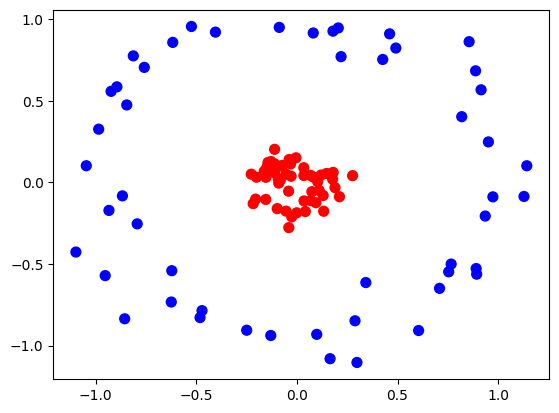

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [9]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


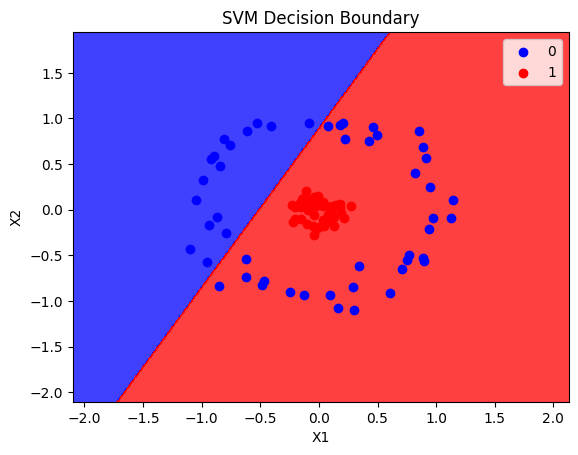

In [10]:
plot_decision_boundary(X, y, classifier)

In [11]:
def plot_3d_plot(X, y):
  # rbf transformation
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

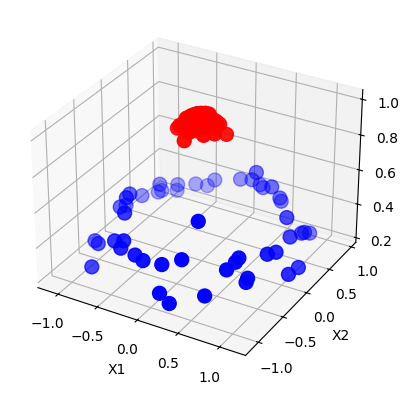

In [12]:
plot_3d_plot(X,y)

In [13]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


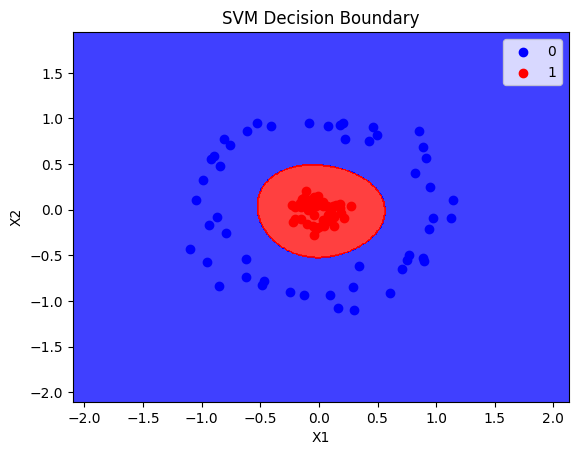

In [15]:
plot_decision_boundary(X, y, rbf_classifier)

In [16]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


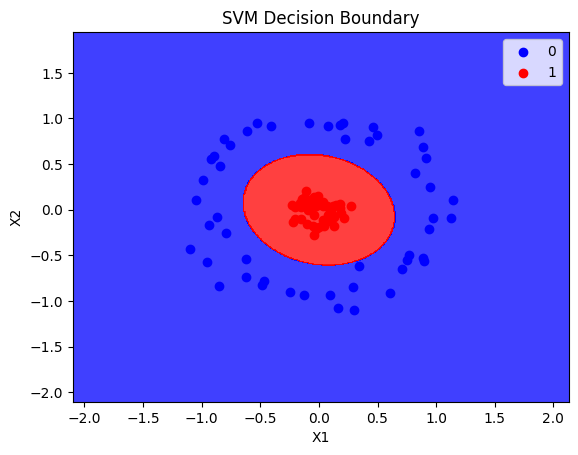

In [18]:
plot_decision_boundary(X, y, poly_classifier)

In [19]:
X

array([[-2.55509444e-02, -2.10677112e-01],
       [-3.12905268e-02,  1.13185480e-01],
       [-2.88173102e-02,  3.76283312e-02],
       [-7.21448865e-02,  1.04123726e-01],
       [ 7.44320657e-02, -5.69039800e-02],
       [-1.10683750e-01,  2.02674303e-01],
       [ 1.03235255e-01,  4.52196797e-03],
       [-8.45279769e-01,  4.74746131e-01],
       [ 7.54025830e-01, -5.48048066e-01],
       [ 9.51391865e-01,  2.48116324e-01],
       [-2.49397824e-01, -9.06121708e-01],
       [ 9.84526009e-02, -9.31404680e-01],
       [ 8.55542444e-01,  8.62383548e-01],
       [-1.09787932e+00, -4.26981200e-01],
       [-2.00428942e-01,  3.15997629e-02],
       [ 1.80250750e-01,  6.10990043e-02],
       [-4.01363775e-02, -2.77142399e-01],
       [-4.55841724e-03,  1.50574187e-01],
       [ 1.12814745e+00, -8.62026999e-02],
       [-7.93369176e-01, -2.54242126e-01],
       [ 8.11728427e-02,  9.15669586e-01],
       [-6.16733461e-01,  8.58064982e-01],
       [ 3.54146107e-02, -1.13694254e-01],
       [ 6.

In [20]:
np.exp(-(X**2)).sum(1)

array([1.95593311, 1.98629214, 1.99775502, 1.98402545, 1.99124236,
       1.94757919, 1.98937862, 1.28764754, 1.30689727, 1.34477755,
       1.37966217, 1.41034798, 0.9563181 , 1.13293093, 1.95962638,
       1.96430568, 1.92445809, 1.97756173, 1.27266636, 1.47029874,
       1.42581248, 1.16250939, 1.9859034 , 1.99352234, 1.40067253,
       1.40707631, 1.13241666, 1.96861126, 1.99077994, 1.92460639,
       1.97577715, 1.93715726, 1.96940863, 1.27723768, 1.97487092,
       1.26100661, 1.26106076, 1.99189394, 1.57534514, 1.96687263,
       1.99303523, 1.9756135 , 1.96552435, 1.50514306, 1.99540854,
       1.96374683, 1.08131346, 1.21057892, 1.99092124, 1.28422223,
       1.94860119, 1.98544932, 1.97531227, 1.38913713, 1.296806  ,
       1.46497719, 1.06478511, 1.15770912, 1.98306438, 1.42572776,
       1.99704485, 1.15927708, 1.96747771, 1.96580405, 1.97905454,
       1.24535256, 1.32428357, 1.94733968, 1.98279493, 1.39184203,
       1.9694251 , 1.98274899, 1.94825898, 0.97816839, 1.39786

In [21]:
X_new=np.exp(-(X**2))

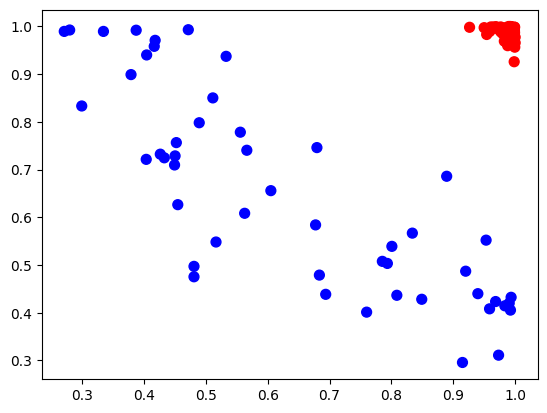

In [22]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')